# Customer Segmentation

In this notebook, we will be analyzing and modelling online purchase history to segment customers into a set of groups by spending habits and another group who buys similar products from the online retail stores located in the United Kingdom.

The dataset contain 540,000 samples of 2,400 customers. 

#### Importing the relevant libraries 

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

### Data Preprocessing

In [62]:
data = pd.read_excel("Downloads/Online Retail.xlsx")

In [63]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [65]:
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [66]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [67]:
data["Total"] = data["UnitPrice"]*data["Quantity"]

### Exploratory Data Analysis - Inspect, Visualize, and Clean the data

The features are the following:

Invoice number: Invoice Number

stockcode: Unique code for each transaction

customer IDs: Unique ID for each cusomter

description: Description of individual item

quantity: Number of iterms bought

price: Price of individual unit

InvoiceDate: Date of purchase

Describe the factors or components that make up the dataset (The "factors" here are called "features" in the machine learning term. These factors are often columns in the tabulated data). For each factor, use a box-plot, scatter plot, histogram, etc., to describe the data distribution as appropriate.

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff47b373e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff476af9a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff476af9e90>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff47ac28590>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff476b15810>],
 'means': []}

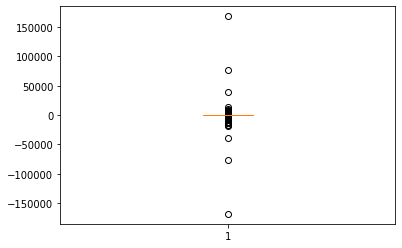

In [68]:
plt.boxplot(data.Total)

It appears from the box plot that there are negative values which does not make sense in terms of price and quantity.

From the inspection below, we can see that there are negative Unit prices which would imply it is a bad debt. Negative quantity may imply out of stock and paid for but we will be focusing on positive quantities and prices. Items that have been paid for and delivered to the customer.

In [69]:
data[data["Quantity"] < 0 ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff47529d610>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff47529d3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff4627d8a10>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff463553510>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff4635539d0>],
 'means': []}

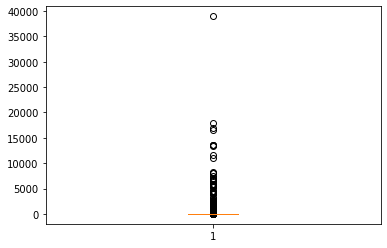

In [70]:
data = data.drop(data[data["UnitPrice"] < 0 ].index)
plt.boxplot(data.UnitPrice)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff453200f90>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff45321f350>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff4531bbbd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff45321fd50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff4531dcc10>],
 'means': []}

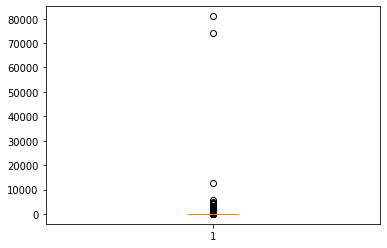

In [71]:
data = data.drop(data[data["Quantity"] < 0 ].index)
plt.boxplot(data.Quantity)

You should determine if your data has outliers or needs to be cleaned in any way. Are there missing data values for specific factors? How will you handle the data cleaning? Will you discard, interpolate or otherwise substitute data values?
If you believe that specific factors will be more important than others in your analysis, you should mention which and why. You will use this to confirm your intuitions in your final write-up.

Since there are not that many outliers compared to the overall size of the dataset, we will drop those rows to help us segment customers more accurately. We are also trying to create clusters of customers and not making predictions so having less outliers will help us understand the general population better. E.g we are only going to keep rows who total is between the 5% quantile and 95% quantile, thus reducing the data size to 480,122 rows.

In [85]:
lower = data['Total'].quantile(0.05)
upper = data['Total'].quantile(0.95)

data = data.drop(data[data["Total"] > upper ].index)
data = data.drop(data[data["Total"] < lower ].index)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff47d7a8a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff478a36b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff47d7a8b10>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff477aef050>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff465373810>],
 'means': []}

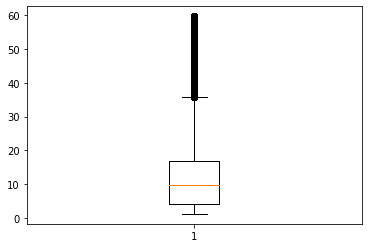

In [117]:
plt.boxplot(data.Total)

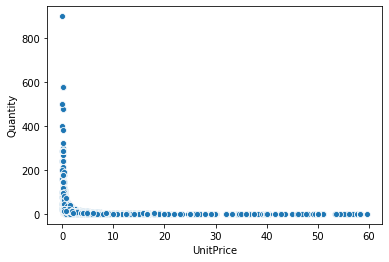

In [89]:
sns.scatterplot( x = data.UnitPrice, y = data.Quantity)

For visualization purpose, we will limit x and y range to see the relationship between unit price and quantity. We can see that most of the unit prices of items are less than $15 and quantities purchased are less than 100.

Analyzing the distribution plot of the total spent by each customer, we can see that most of the purchases are less than $200. From the correlation between unit price and quantity, we can see that the 2 features have fairly strong negative correlation (-0.29). When price goes higher less quantities are bought of that item and vice versa. This makes sense as products usually bigger when prices go up such as appliances, electronics, and equipment.

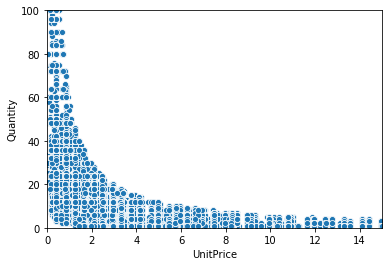

In [92]:
sns.scatterplot( x = data.UnitPrice, y = data.Quantity)
plt.ylim(0,100)
plt.xlim(0, 15)
plt.show()

In [108]:
data.corr()

,Quantity,UnitPrice,CustomerID,Total
Quantity,1.000000,-0.294342,-0.087934,0.414791
UnitPrice,-0.294342,1.000000,-0.020216,0.273704
CustomerID,-0.087934,-0.020216,1.000000,-0.147707
Total,0.414791,0.273704,-0.147707,1.000000


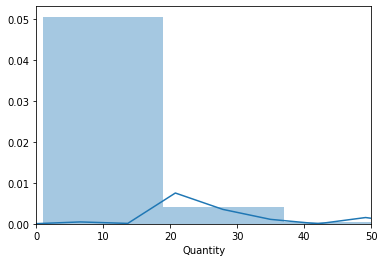

In [96]:
sns.distplot(data['Quantity'])
plt.xlim(0, 50)
plt.show()

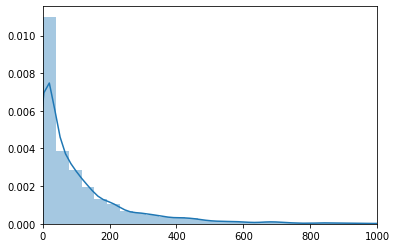

In [118]:
#groupby_quant
groupby_customer = data.groupby(['CustomerID'])['Total'].count()
sns.distplot(groupby_quant)
plt.xlim(0, 1000)
plt.show()

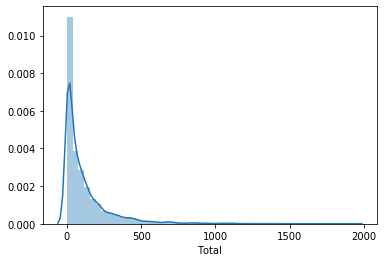

In [99]:
groupby_quant = data.groupby(['Description'])['Total'].count()
sns.distplot(groupby_quant)
#plt.xlim(0, 1000)
#plt.show()

In [106]:
# The following are top 10 products that are bought the most by customers from this online retailer.

groupby_quant = pd.DataFrame(groupby_quant)
groupby_quant.sort_values(by=['Total']).tail(10)

,Total
Description,
HEART OF WICKER SMALL,1188
NATURAL SLATE HEART CHALKBOARD,1203
LUNCH BAG BLACK SKULL.,1270
SET OF 3 CAKE TINS PANTRY DESIGN,1321
ASSORTED COLOUR BIRD ORNAMENT,1323
REGENCY CAKESTAND 3 TIER,1402
PARTY BUNTING,1441
LUNCH BAG RED RETROSPOT,1478
JUMBO BAG RED RETROSPOT,1824


As we can tell from the scatterplot, the data points are very spread out since some items are bought in huge quantiies or the prices are very high so to avoid skewing our model, we will create a separate customer table and normalize it to help us make segment the customers accurately. We will keep our original table separate since we will use it to cluster different types of products.

We will create new customer table with the total amount spent and total number of transactions.

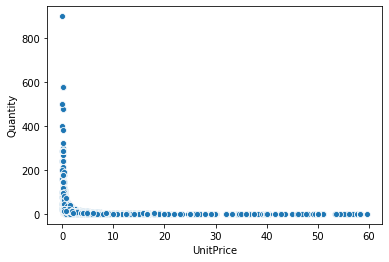

In [107]:
sns.scatterplot( x = data.UnitPrice, y = data.Quantity)

#### Creating new customer tables 

we will create 2 new customer tables: One will be normalized and the other will remain the same.

In [234]:
df_sum = pd.DataFrame(data.groupby(['CustomerID'])['Total'].sum())
groupby_customer = pd.DataFrame(groupby_customer)
df_customer = pd.merge(groupby_customer, df_sum, on='CustomerID')
df_customer = df_customer.rename(columns = {"Total_x":"Total_transactions", "Total_y":"Total_Spent"})

In [235]:
df_customer

,Total_transactions,Total_Spent
CustomerID,,
12347.0,175,3516.98
12348.0,23,803.24
12349.0,71,1393.75
12350.0,17,334.40
12352.0,80,1505.74
...,...,...
18280.0,10,180.60
18281.0,7,80.82
18282.0,12,178.05


In [236]:
customer_normalized = df_customer.copy()
customer_normalized['Total_transactions'] = (customer_normalized['Total_transactions']-customer_normalized['Total_transactions'].mean())/customer_normalized['Total_transactions'].std()

total_spent = customer_normalized['Total_Spent']
customer_normalized['Total_Spent'] = (total_spent - total_spent.mean())/total_spent.std()
customer_normalized

,Total_transactions,Total_Spent
CustomerID,,
12347.0,0.436246,0.959288
12348.0,-0.302309,-0.133933
12349.0,-0.069081,0.103952
12350.0,-0.331463,-0.322804
12352.0,-0.025351,0.149067
...,...,...
18280.0,-0.365475,-0.384761
18281.0,-0.380052,-0.424957
18282.0,-0.355757,-0.385789


#### Data Preparation 

We will split the data into training(95%) and test(5%) dataset for model building and validation. I am using a smaller proportion for testing as we have a lot of data available and ~20,000 is still a solid amount for testing. however, for some unsupervised models we will use the entire dataset as we are intend to segment customers based on new labels.

After randomly spliting the data, we have the following:

Training size: 456, 115 rows

Test size: 24, 007 rows

In [110]:
from sklearn.model_selection import train_test_split

In [237]:
train, test = train_test_split(data, test_size = 0.05, random_state=30)

In [238]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [239]:
customer_train, customer_test = train_test_split(customer_normalized, test_size = 0.15, random_state=30)

In [240]:
customer_train

,Total_transactions,Total_Spent
CustomerID,,
15916.0,0.319632,0.156628
14620.0,-0.287733,-0.291229
13639.0,-0.229426,-0.185103
12596.0,-0.292591,-0.280251
15521.0,0.441105,0.445171
...,...,...
15801.0,-0.103094,-0.028907
13952.0,0.232172,0.772323
13617.0,-0.205131,-0.238677


### Building Unsupervised Learning Models

There are 2 types of models we will be building:

1. Customer segmentation models using K-means clustering

2. Products segmentation models using matrix factorization

#### Customer Segmentation

K-means clustering

We will train the model on the entire dataset using K-means and then using the elbow method to find the optimal number of customers. From observing the visualizations of sse at different clusters, we can see that the optimal number of clusters are 3.

In [242]:
customer_normalized

,Total_transactions,Total_Spent
CustomerID,,
12347.0,0.436246,0.959288
12348.0,-0.302309,-0.133933
12349.0,-0.069081,0.103952
12350.0,-0.331463,-0.322804
12352.0,-0.025351,0.149067
...,...,...
18280.0,-0.365475,-0.384761
18281.0,-0.380052,-0.424957
18282.0,-0.355757,-0.385789


In [163]:
import warnings
warnings.filterwarnings('ignore')

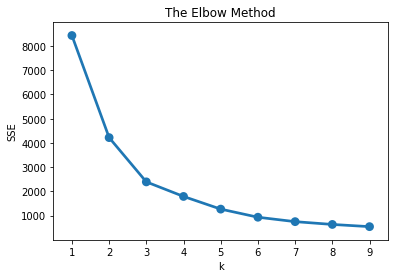

In [243]:
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=30)
    kmeans.fit(customer_normalized)
    sse[k] = kmeans.inertia_ 
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y = list(sse.values()))

In [244]:
kmeans = KMeans(n_clusters = 3, random_state = 30)
kmeans.fit(customer_normalized)
kmeans.labels_

array([2, 0, 0, ..., 0, 2, 0], dtype=int32)

In [245]:
labels = pd.DataFrame(kmeans.labels_, columns = ["Cluster"])

t = labels[labels["Cluster"]==2].shape[0]
u = labels[labels["Cluster"]==1].shape[0]
v = labels[labels["Cluster"]==0].shape[0]

print(t,u,v)

351 4 3863


Now that we know we can split the customers into 3 groups, let's use AgglomerativeClustering to cluster these customers more accurately as one of the clusters only has 4 customers.

After varying the parameters of Agglomerative Clustering, using complete distance (maximum distance) as a linkage criterion and cosine metric to compute the linkage we get clusters that are fairly populated. 

Cluster 1: 1101

Cluster 2: 2993

Cluster 3: 124

In [254]:
linkage_methods = ['ward', 'complete', 'average', 'single']
affinity = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
parameter_lst = {}
for link in linkage_methods:
    for elm in affinity:
        if link == 'ward':
            model3 = AgglomerativeClustering(n_clusters=3, linkage = link, affinity = 'euclidean')
            model3.fit(customer_normalized)
            labels = pd.DataFrame(model3.labels_, columns = ["Cluster"])

            t = labels[labels["Cluster"]==2].shape[0]
            u = labels[labels["Cluster"]==1].shape[0]
            v = labels[labels["Cluster"]==0].shape[0]
            parameter_lst[(link, elm)] = (v, u, t)
        else:
            model3 = AgglomerativeClustering(n_clusters=3, linkage = link, affinity = elm)
            model3.fit(customer_normalized)
            labels = pd.DataFrame(model3.labels_, columns = ["Cluster"])

            t = labels[labels["Cluster"]==2].shape[0]
            u = labels[labels["Cluster"]==1].shape[0]
            v = labels[labels["Cluster"]==0].shape[0]
            parameter_lst[(link, elm)] = (v, u, t)
            

parameter_lst

{('ward', 'euclidean'): (4, 335, 3879),
 ('ward', 'l1'): (4, 335, 3879),
 ('ward', 'l2'): (4, 335, 3879),
 ('ward', 'manhattan'): (4, 335, 3879),
 ('ward', 'cosine'): (4, 335, 3879),
 ('complete', 'euclidean'): (4214, 3, 1),
 ('complete', 'l1'): (4214, 3, 1),
 ('complete', 'l2'): (4214, 3, 1),
 ('complete', 'manhattan'): (4214, 3, 1),
 ('complete', 'cosine'): (2992, 736, 490),
 ('average', 'euclidean'): (4214, 3, 1),
 ('average', 'l1'): (4214, 3, 1),
 ('average', 'l2'): (4214, 3, 1),
 ('average', 'manhattan'): (4214, 3, 1),
 ('average', 'cosine'): (1101, 2993, 124),
 ('single', 'euclidean'): (4216, 1, 1),
 ('single', 'l1'): (3, 1, 4214),
 ('single', 'l2'): (4216, 1, 1),
 ('single', 'manhattan'): (3, 1, 4214),
 ('single', 'cosine'): (59, 1238, 2921)}

In [261]:
agg_cluster = AgglomerativeClustering(n_clusters = 3,linkage = 'average', affinity = 'cosine').fit(customer_normalized)
agg_cluster.labels_

array([0, 1, 0, ..., 1, 0, 0])

In [262]:
labels = pd.DataFrame(agg_cluster.labels_, columns = ["Cluster"])

t = labels[labels["Cluster"]==2].shape[0]
u = labels[labels["Cluster"]==1].shape[0]
v = labels[labels["Cluster"]==0].shape[0]

print(v, u, t)

1101 2993 124


In [263]:
df_customer['Cluster'] = agg_cluster.labels_
df_customer

,Total_transactions,Total_Spent,Cluster
CustomerID,,,
12347.0,175,3516.98,0
12348.0,23,803.24,1
12349.0,71,1393.75,0
12350.0,17,334.40,1
12352.0,80,1505.74,0
...,...,...,...
18280.0,10,180.60,1
18281.0,7,80.82,1
18282.0,12,178.05,1


From visual inspection of the 3 clusters, we can observe the following:

Cluster 1: Customers who buy in large quantities upto 7000, most being between 400 and 1000 quantities. Example, wholesalers

Cluster 2: Customers who spend less than $1200 in quantities between 0 and 120

Cluster 3: Customers who spend between \$500 and $1100 and buy in quantities between 90 and 400.

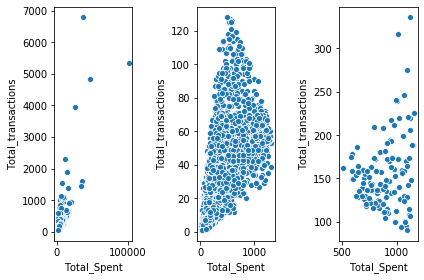

In [264]:
cluster1 = df_customer[df_customer['Cluster']==0]
cluster2 = df_customer[df_customer['Cluster']==1]
cluster3 = df_customer[df_customer['Cluster']==2]

plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 3)
sns.scatterplot( x = cluster1.Total_Spent, y = cluster1.Total_transactions, ax=axes[0])
sns.scatterplot( x = cluster2.Total_Spent, y = cluster2.Total_transactions, ax=axes[1])
sns.scatterplot( x = cluster3.Total_Spent, y = cluster3.Total_transactions, ax=axes[2])
plt.show()

#### Product Segmentation

In [266]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [267]:
vect = TfidfVectorizer(min_df=50, stop_words='english')
X = vect.fit_transform(data.Description)

In [276]:
word_count = {}
for row in range(len(data['Description'])):
    try:
        word_list = str(data['Description'][row]).split()
        for elm in word_list:
            if elm not in vect.get_stop_words():
                if elm in word_count:
                    word_count[elm] += 1
                else:
                    word_count[elm] = 1
    except:
        pass

In [277]:
from operator import itemgetter
res = dict(sorted(word_count.items(), key = itemgetter(1), reverse = True)[:20])
  
# printing result
print("The top N value pairs are  " + str(res))

The top N value pairs are  {'SET': 43316, 'BAG': 42905, 'OF': 41318, 'RED': 34308, 'HEART': 31248, 'RETROSPOT': 28510, 'VINTAGE': 26214, 'DESIGN': 24525, 'PINK': 24325, 'BOX': 19246, 'CHRISTMAS': 17724, 'METAL': 17477, 'JUMBO': 16825, 'WHITE': 16408, 'BLUE': 16164, 'CAKE': 16131, 'LUNCH': 15720, '3': 14596, 'SIGN': 14304, 'HANGING': 13441}


In [312]:
model_nmf = NMF(n_components = 4, random_state = 30, solver='mu', beta_loss = 'kullback-leibler', alpha = 1)
model_nmf.fit(X)
nmf_features = model_nmf.transform(X)

In [313]:
model_nmf.components_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.07825904, 0.        ,
        0.46740053],
       [0.        , 0.1799101 , 0.51137083, ..., 0.        , 0.        ,
        0.        ],
       [0.39569047, 0.        , 0.84450455, ..., 0.11738465, 0.00497227,
        0.        ]])

In [314]:
print(nmf_features.shape)
print(model_nmf.components_.shape)

(480122, 4)
(4, 1479)


In [315]:
components_df = pd.DataFrame(model_nmf.components_, columns=vect.get_feature_names())
components_df

,10,11,12,120cm,125g,15,15c,15cm,16,20,...,word,world,woven,wrap,wrapping,wreath,writing,yellow,yuletide,zinc
0,0.00000,0.00000,0.000000,1.235424e-02,0.041848,0.010847,0.000000,0.000000,8.979997e-08,0.000000,...,0.000000,0.071803,0.000000,0.578419,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.00000,0.00000,0.000000,2.963251e-15,0.000000,0.000000,0.050482,0.007762,0.000000e+00,0.000000,...,0.185807,0.000000,0.000000,0.000000,0.000000,0.123083,0.000000,0.078259,0.000000,0.467401
2,0.00000,0.17991,0.511371,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.763651,...,0.000000,0.000000,0.000000,0.000000,0.009988,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.39569,0.00000,0.844505,0.000000e+00,0.000000,0.000000,0.000000,0.025900,5.613087e-02,0.028206,...,0.000000,0.000000,0.033636,0.236893,0.000000,0.000000,0.061485,0.117385,0.004972,0.000000


In [316]:
pred_class = pd.DataFrame({'id' : [0, 1, 2, 3], 'category' : ['Type 1', 'Type 2', 'Type 3', 'Type 4']})

train_pred = pd.DataFrame({'id':pd.DataFrame(nmf_features).idxmax(axis=1)})
pred = train_pred.merge(pred_class, how = 'left', on = 'id').category

In [317]:
pred

0         Type 2
1         Type 2
2         Type 2
3         Type 2
4         Type 2
           ...  
480117    Type 3
480118    Type 1
480119    Type 1
480120    Type 1
480121    Type 3
Name: category, Length: 480122, dtype: object

In [318]:
data['Product Type'] = pred

In [319]:
data.groupby(['Product Type']).count()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
Product Type,,,,,,,,,
Type 1,89374,89374,89374,89374,89374,89374,67058,89374,89374
Type 2,127881,127881,127881,127881,127881,127881,96381,127881,127881
Type 3,73465,73465,73465,73465,73465,73465,55064,73465,73465
Type 4,134760,134760,134760,134760,134760,134760,101572,134760,134760


Home Decor?

In [327]:
data[data['Product Type'] == 'Type 3'].sample(60)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Product Type
108213,545518,85194L,HANGING SPRING FLOWER EGG LARGE,12,2011-03-03 12:24:00,0.85,18218.0,United Kingdom,10.20,Type 3
6285,536876,21704,BAG 250g SWIRLY MARBLES,2,2010-12-03 11:36:00,1.66,NaN,United Kingdom,3.32,Type 3
290757,562417,23028,DRAWER KNOB CRACKLE GLAZE BLUE,1,2011-08-04 16:32:00,3.29,NaN,United Kingdom,3.29,Type 3
171971,551507,22203,MILK PAN RED RETROSPOT,4,2011-04-28 18:11:00,3.75,18272.0,United Kingdom,15.00,Type 3
135826,547911,21955,DOORMAT UNION JACK GUNS AND ROSES,2,2011-03-28 12:25:00,7.95,14127.0,United Kingdom,15.90,Type 3
227081,556819,23251,VINTAGE RED ENAMEL TRIM MUG,12,2011-06-15 10:21:00,1.25,12682.0,France,15.00,Type 3
11214,537240,22190,LOCAL CAFE MUG,4,2010-12-06 10:08:00,2.51,NaN,United Kingdom,10.04,Type 3
428198,573415,23333,IVORY WICKER HEART MEDIUM,7,2011-10-30 16:17:00,1.25,13607.0,United Kingdom,8.75,Type 3
78210,542849,22457,NATURAL SLATE HEART CHALKBOARD,12,2011-02-01 11:35:00,2.95,NaN,United Kingdom,35.40,Type 3
426473,573353,22722,SET OF 6 SPICE TINS PANTRY DESIGN,1,2011-10-30 12:39:00,3.95,16115.0,United Kingdom,3.95,Type 3


Storage and Kitchen related items

In [326]:
data[data['Product Type'] == 'Type 4'].sample(60)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Product Type
424102,573184,22383,LUNCH BAG SUKI DESIGN,10,2011-10-28 11:33:00,1.65,14110.0,United Kingdom,16.50,Type 4
241485,558232,21090,SET/6 COLLAGE PAPER PLATES,10,2011-06-27 14:30:00,0.39,17841.0,United Kingdom,3.90,Type 4
217532,555925,22254,FELT TOADSTOOL LARGE,1,2011-06-07 17:13:00,2.46,NaN,United Kingdom,2.46,Type 4
268097,560385,23094,LE GRAND TRAY CHIC SET,2,2011-07-18 12:53:00,12.50,14583.0,United Kingdom,25.00,Type 4
115405,546118,22468,BABUSHKA LIGHTS STRING OF 10,2,2011-03-09 14:14:00,6.75,13078.0,United Kingdom,13.50,Type 4
419254,572762,17084R,ASSORTED INCENSE PACK,72,2011-10-26 09:50:00,0.21,15240.0,United Kingdom,15.12,Type 4
19610,537871,22553,PLASTERS IN TIN SKULLS,1,2010-12-08 17:20:00,1.65,12748.0,United Kingdom,1.65,Type 4
282646,561651,84976,RECTANGULAR SHAPED MIRROR,1,2011-07-28 15:36:00,3.29,NaN,United Kingdom,3.29,Type 4
162554,550512,22517,CHILDS GARDEN RAKE PINK,1,2011-04-18 16:31:00,2.10,18069.0,United Kingdom,2.10,Type 4
132490,547666,22676,FRENCH BLUE METAL DOOR SIGN 1,10,2011-03-24 13:23:00,1.25,14235.0,United Kingdom,12.50,Type 4


Results

Discussion